In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly_express as px
%matplotlib inline

In [2]:
df = pd.read_csv('bigmart.csv')

In [3]:
df.shape

(8523, 12)

In [4]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


Differentiating categorical features -
* Item_Identifier - Code to identify object
* Item_Fat_Content - Fat content in food products
* Item_Type - Tells about type of item it is
* Outlet_Identifier - Code to identify an outlet
* Outlet_Size - Tells if an outlet is small, medium, or large
* Outlet_Location_Type - Tells if the outlet falls in tier 1, tier 2, or tier 3
* Outlet_Type - What type of outlet it is - Supermarket or Grocery

Remaining are numerical features.

In [6]:
# Checking for missing values

df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

* Item_Weight is a numerical feature, hence filling it with mean.
* Outlet_Size  is a categorical feature, hence filling it with mode.

In [7]:
# Filling the missing values in 'Item_Weight'

df['Item_Weight'] = df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [8]:
# # Filling the missing values in 'Item_Weight'

size_mode = df.pivot_table(values = 'Outlet_Size', columns = 'Outlet_Type', aggfunc = (lambda x: x.mode()[0]))
print (size_mode)

Outlet_Type Grocery Store Supermarket Type1 Supermarket Type2  \
Outlet_Size         Small             Small            Medium   

Outlet_Type Supermarket Type3  
Outlet_Size            Medium  


* As, mode outlet size for each type of outlet is different, hence we cannot directly use mode().
* Outlet_size is correlated to Outlet_type. Therefore, using pivot_table() to establish a relationship b/w both the features.

In [9]:
df['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [10]:
miss = df['Outlet_Size'].isnull()
df.loc[miss, 'Outlet_Size'] = df.loc[miss, 'Outlet_Type'].apply(lambda x: size_mode[x])

In [11]:
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

All the missing values are filled.

# Data analysis and visualization

In [12]:
# To get the statistics of all the numerical features

df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [13]:
# Sets the interface for the plot

sns.set()

### Analyzing the numerical features -

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


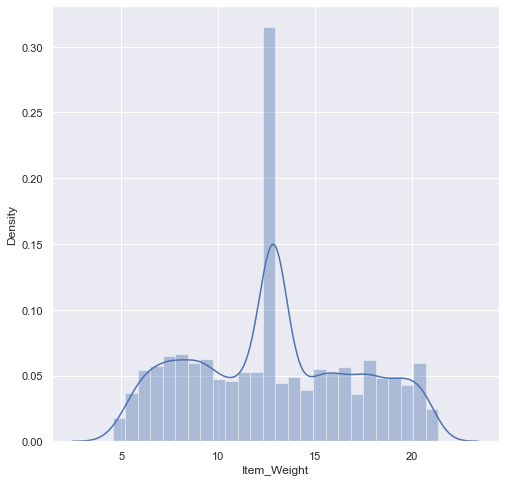

In [14]:
# Distribution of 'Item_Weight'

plt.rcParams['figure.figsize'] = (8, 8)
sns.distplot(df['Item_Weight'])
plt.show()

* Most items are of weight between `12 - 13 unit`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


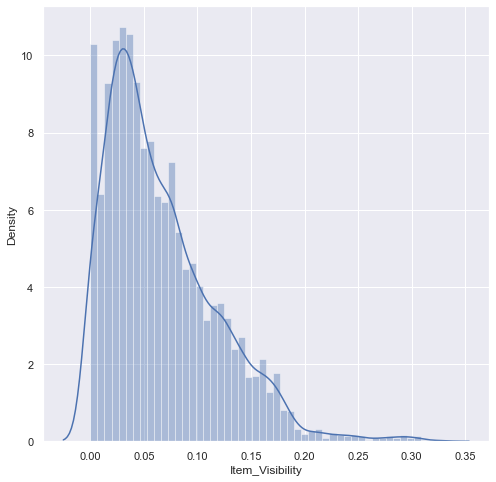

In [15]:
# Distribution of 'Item_Visibility'
# Item_Visibility --> Can a customer locate a particular item.

plt.rcParams['figure.figsize'] = (8, 8)
sns.distplot(df['Item_Visibility'])
plt.show()

* It is a `skewness` plot i.e. the graph is heavier at one side.
* Visibility is more between `0.05 - 0.15`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


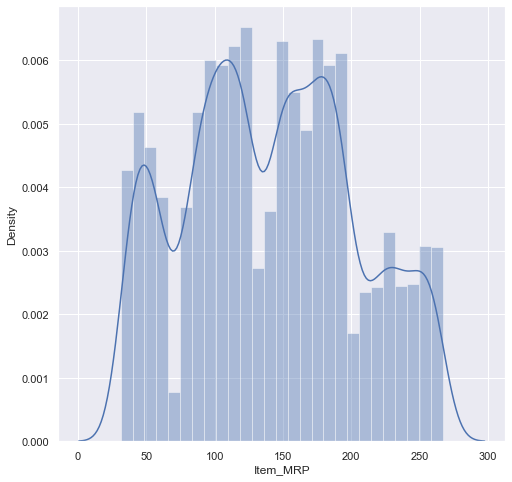

In [16]:
# Distribution of 'Item_MRP'

plt.rcParams['figure.figsize'] = (8, 8)
sns.distplot(df['Item_MRP'])
plt.show()

* Normal distribution
* Store has more items within a price range of `100 - 170`.
* Store has least good items for `MRP 200 and above`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


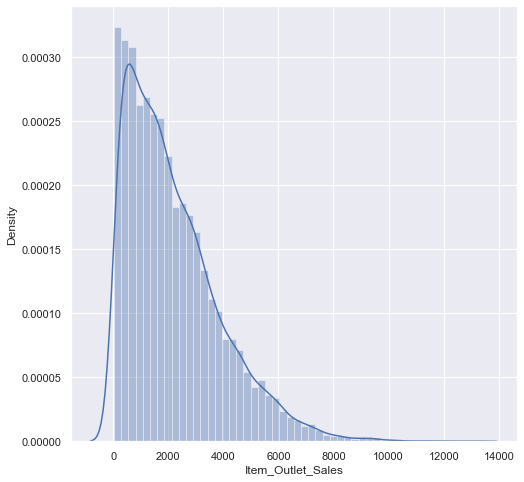

In [17]:
# Distribution of 'Item_Outlet_Sales'

plt.rcParams['figure.figsize'] = (8, 8)
sns.distplot(df['Item_Outlet_Sales'])
plt.show()

* Skewed distribution
* More sales are between `1000 - 2000`.

c:\users\kiit\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


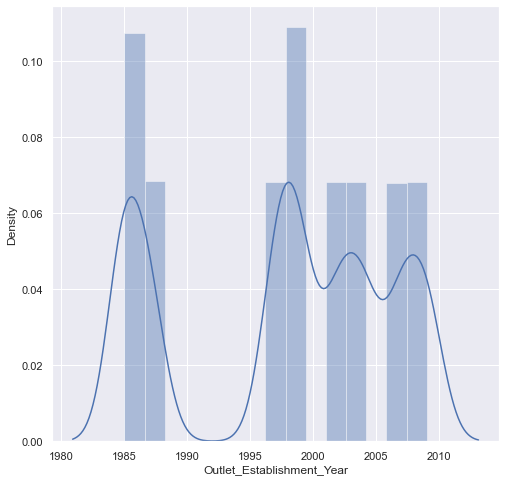

In [18]:
# Distribution of 'Outlet_Establishment_Year'

plt.rcParams['figure.figsize'] = (8, 8)
sns.distplot(df['Outlet_Establishment_Year'])
plt.show()

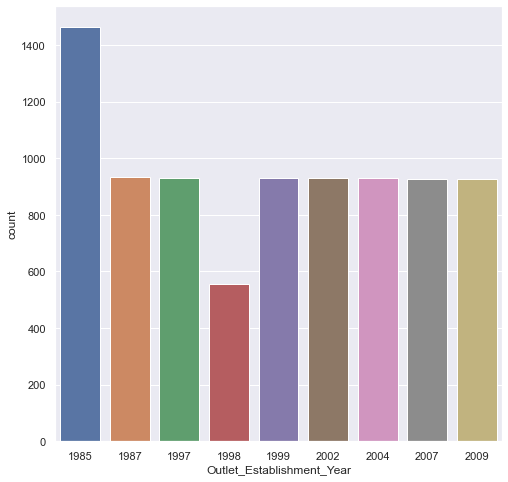

In [19]:
# Count plot distribution of 'Outlet_Establishment_Year' for better view

plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Outlet_Establishment_Year')
plt.show()

* In `1985`, sales were maximum or maximum number of outlets were established.
* In `1998`, sales were the least or the least number of outlets were established.
* Sales or the outlets established remains same for remaining years.

### Analyzing the categorical features - 

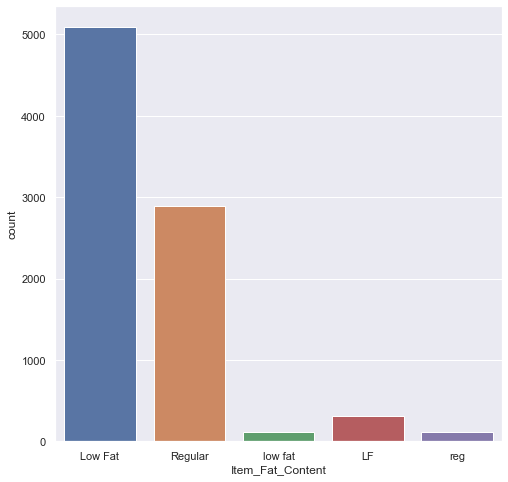

In [20]:
# Distribution of 'Item_Fat_Content'

plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Item_Fat_Content')
plt.show()

* Basically, there are 2 categories - `Low fat` and `Regular`, which needs to be merged.
* Low fat products are more available.

In [21]:
# Replacing different names for same item

df['Item_Fat_Content'] = df['Item_Fat_Content'].replace(('low fat', 'LF', 'reg'), ('Low Fat', 'Low Fat', 'Regular'))

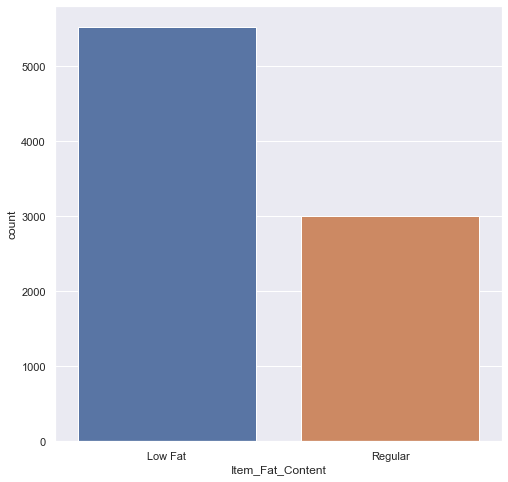

In [22]:
plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Item_Fat_Content')
plt.show()

In [23]:
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

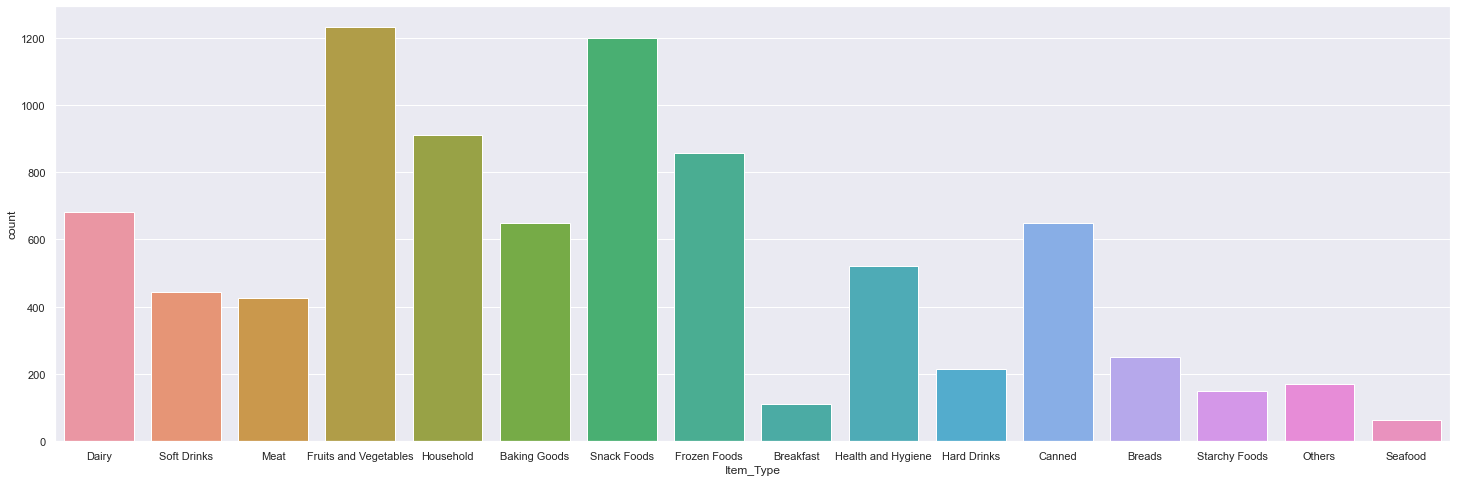

In [24]:
# Distribution of 'Item_Type'

plt.rcParams['figure.figsize'] = (25, 8)
sns.countplot(data = df, x = 'Item_Type')
plt.show()

* `Fruit and Vegetables` and `Snack Foods` are the two most available item in the store.
* Seafood is least available.

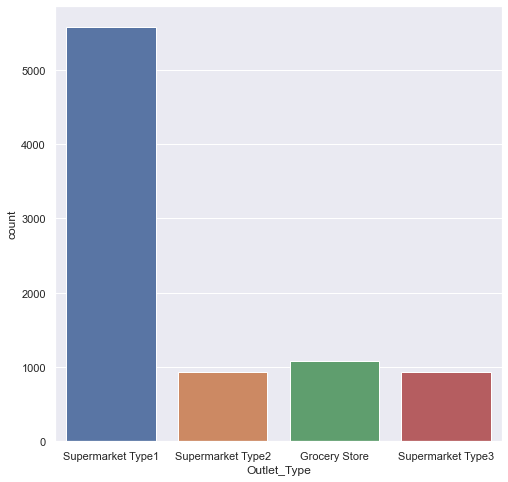

In [25]:
# Distribution of 'Outlet_Type'

plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Outlet_Type')
plt.show()

* Most of the stores are of type - `Supermarket Type1`

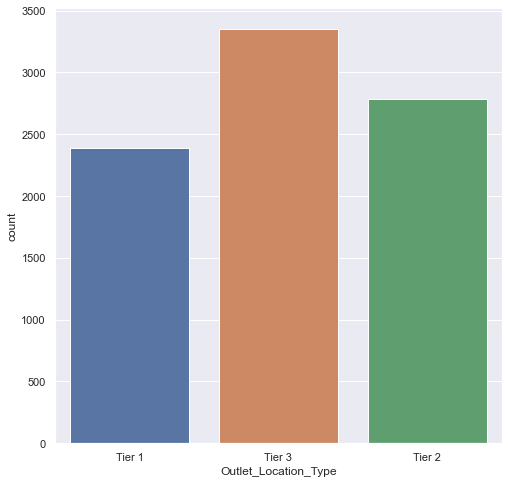

In [26]:
# Distribution of 'Outlet_Location_Type'

plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Outlet_Location_Type')
plt.show()

* Most of the outlets are of `Tier 3`.

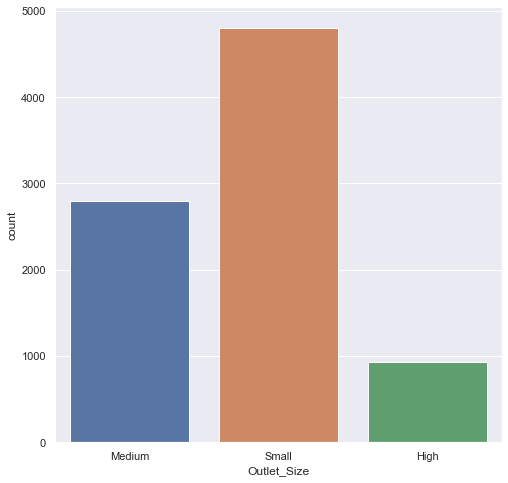

In [27]:
# Distribution of 'Outlet_Size'

plt.rcParams['figure.figsize'] = (8, 8)
sns.countplot(data = df, x = 'Outlet_Size')
plt.show()

* Most of the outlets are of `small size`.

# Data preprocessing

In [28]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Small,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


### Encoding

In [29]:
# As machine cannot understand anything other than numerical values, hence converting categorical value to numerical value.
# Label encoding is used for this conversion

from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()

In [30]:
# Encoding categorical features

df['Item_Identifier'] = encode.fit_transform(df['Item_Identifier'])
df['Item_Fat_Content'] = encode.fit_transform(df['Item_Fat_Content'])
df['Item_Type'] = encode.fit_transform(df['Item_Type'])
df['Outlet_Identifier'] = encode.fit_transform(df['Outlet_Identifier'])
df['Outlet_Size'] = encode.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type'] = encode.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type'] = encode.fit_transform(df['Outlet_Type'])

In [31]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,0,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,1,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,0,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,1,0.000000,6,182.0950,0,1998,2,2,0,732.3800
4,1297,8.93,0,0.000000,9,53.8614,1,1987,0,2,1,994.7052


* All the categories are encoded to a numerical value.

# Using the dataset to model

In [32]:
from sklearn.model_selection import train_test_split

### Splitting the dataset

In [33]:
# Splitting the dataset into features and target

x = df.drop(columns = 'Item_Outlet_Sales', axis = 1)
y = df['Item_Outlet_Sales']

In [34]:
print (x)

      Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  \
0                 156        9.300                 0         0.016047   
1                   8        5.920                 1         0.019278   
2                 662       17.500                 0         0.016760   
3                1121       19.200                 1         0.000000   
4                1297        8.930                 0         0.000000   
...               ...          ...               ...              ...   
8518              370        6.865                 0         0.056783   
8519              897        8.380                 1         0.046982   
8520             1357       10.600                 0         0.035186   
8521              681        7.210                 1         0.145221   
8522               50       14.800                 0         0.044878   

      Item_Type  Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  \
0             4  249.8092                  9    

In [35]:
print (y)

0       3735.1380
1        443.4228
2       2097.2700
3        732.3800
4        994.7052
          ...    
8518    2778.3834
8519     549.2850
8520    1193.1136
8521    1845.5976
8522     765.6700
Name: Item_Outlet_Sales, Length: 8523, dtype: float64


In [36]:
# Splitting the data for training and testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [37]:
print (x.shape, x_train.shape, x_test.shape)

(8523, 11) (5966, 11) (2557, 11)


### Using Linear regression

In [50]:
#from sklearn.linear_model import LinearRegression

In [51]:
#lr = LinearRegression()
#lr.fit(x_train, y_train)

LinearRegression()

#### Evaluation

In [52]:
#lin_acc = lr.score(x_test, y_test)
#print ('Model accuracy: {}%'.format(round((lin_acc * 100), 2)))

Model accuracy: 50.36%


* Model accuracy of Linear regression - `50.36 %`

### Using Decision tree

In [58]:
#from sklearn.tree import DecisionTreeRegressor
#from sklearn import metrics

In [59]:
#dt = DecisionTreeRegressor()
#dt.fit(x_train, y_train)

DecisionTreeRegressor()

#### Evaluation

In [61]:
#acc = dt.score(x_test, y_test)
#print ('Model accuracy: {}%'.format(round((acc * 100), 2)))

Model accuracy: 23.11%


* Model accuracy of Decision tree regressor - `23.11 %`

### Installing xgboost

In [38]:
#! pip install xgboost

### Using XGBRegressor

In [64]:
from xgboost import XGBRegressor
from sklearn import metrics

In [65]:
# Training the model

xg = XGBRegressor()
xg.fit(x_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

#### Evaluation

In [66]:
# Predicting the value of y_train for corresponding x_train

train_pred = xg.predict(x_train)

In [67]:
# Calculating r2 score which lies between 0 and 1.
# If the score is closer to 1, model is good and if closer to 0, model is bad.

train_r2 = metrics.r2_score(y_train, train_pred)

In [68]:
print ('Root squared value for training data:', train_r2)

Root squared value for training data: 0.8831454440044499


In [69]:
# Predicting the value of y_test for corresponding x_test

test_pred = xg.predict(x_test)

In [70]:
test_r2 = metrics.r2_score(y_test, test_pred)

In [71]:
print ('Root squared value for testing data:', test_r2)

Root squared value for testing data: 0.5347849510539808


* If the difference of root sqaure value for train and test is too high, the model is `overfitted`.

In [72]:
acc = xg.score(x_test, y_test)
print ('Model accuracy: {}%'.format(round((acc * 100), 2)))

Model accuracy: 53.48%


* Model accuracy of XGBRegressor - `53.48 %`